## Anova(Analysis of Variance)

ANOVA is a statistical method for making multiple group comparisons. Its provides an easy way to eliminate variables that contribute little in predicting the dependent variable. ANOVA tests the features in general rather than specific differences in mean of features. In this notebook, we will focus on one way ANOVA. In one way ANOVA, we will focus we compare effects of a single independent variable. 

It is called analysis of variance because it involves taking the entire variance in a dataset and divides the source of variance into different components. Each individual score is the product of the mean of the population, the effects of the independent variable and random error.

There are three components of variance. Total variance is the variance of all subjects regardless of the group to which they belong. Total variance is further partitioned in to between-groups variance and within-groups variance. Between-groups variance is the index of differences among group means due to the effects of the independent variable and random error. It represents the variance between the group’s means. Within-groups variance represents the differences among subjects in groups due to random error. It represents the variance among subjects within each group of the experiment. The source for the variance both between-groups and within-groups is their sum of squares. 

The F-ratio metric determines if differences among group means is due to random variation or if the differences are due to nonchnace. It is expressed as

$$F = \frac{between-group variance}{within-group variance}$$

Anova helps to determine whether the means from more than two populations or groups are equal or not. In another words whether the difference in means is statistically significant or not. If the ANOVA F-test shows there is a significant difference in
means between the groups we may want to perform multiple comparisons between all pair-wise means to determine how they differ.

Analyze the auto miles per gallon dataset to find how variables are similar are dissimilar to each other.

Load the auto-mpg dataset from ~/datasets/auto-mpg/

In [1]:
auto_data=read.csv("../../../datasets/auto-mpg/auto-mpg.csv")
head(auto_data)

mpg,cylinders,displacement,horsepower,weight,acceleration,model.year,origin,car.name
18,8,307,130.0,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165.0,3693,11.5,70,1,buick skylark 320
18,8,318,150.0,3436,11.0,70,1,plymouth satellite
16,8,304,150.0,3433,12.0,70,1,amc rebel sst
17,8,302,140.0,3449,10.5,70,1,ford torino
15,8,429,198.0,4341,10.0,70,1,ford galaxie 500


In [2]:
str(auto_data)

'data.frame':	398 obs. of  9 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : int  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : Factor w/ 94 levels "?    ","100.0",..: 17 35 29 29 24 42 47 46 48 40 ...
 $ weight      : int  3504 3693 3436 3433 3449 4341 4354 4312 4425 3850 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ model.year  : int  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ car.name    : Factor w/ 305 levels "amc ambassador brougham",..: 50 37 232 15 162 142 55 224 242 2 ...


### One way between ANOVA

Frame null hypothesis as

$H_o: $ No significant difference exist in miles per gallon among vehicles of different origin

$H_1: $ Significant difference exist in miles per gallon among vehicles of different origin

Use aov() function in R to test the null hypothesis whether to reject or fail to reject the null hypothesis.

Plot a graph to compare the means of mpg across groups. The independent variable should be a factor to create group wise plots. So convert the variable origin into a factor. 

In [3]:
auto_data$origin=as.factor(auto_data$origin)

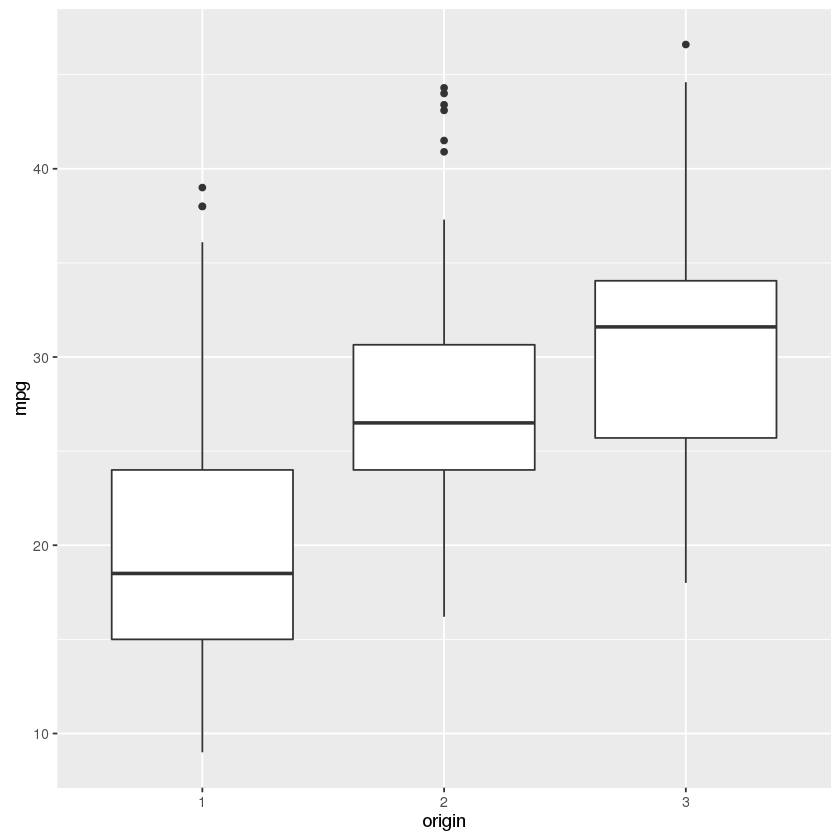

In [4]:
library(ggplot2)
ggplot(auto_data,aes(origin,mpg))+geom_boxplot()

From the plot it appears average mpg for vehicles from origin 3 is higher compared to other origins and origin 1 has least average mpg.

In [5]:
# General form for aov() is aov(response ~ factor, data=data_name)
# where response represents the response variable and factor the variable that separates the data into groups. 
# Both variables should be contained in the dataframe called data_name.

fit <- aov(mpg ~ origin, data=auto_data)
summary(fit)

             Df Sum Sq Mean Sq F value Pr(>F)    
origin        2   8073    4036   98.54 <2e-16 ***
Residuals   395  16180      41                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

According to above results the F-statistic is 98.54 with a p-value almost equal to 0. Null hypothesis that there is no difference in smoking habits of males and females can be clearly rejected.

In [6]:
# Show the means
# model.tables() computes summary tables for model fits, especially complex aov fits.
# type = "means" give tables of the mean response for each combinations of levels of the factors in a term.
model.tables(fit, "means")

Tables of means
Grand mean
         
23.51457 

 origin 
         1     2     3
     20.08 27.89 30.45
rep 249.00 70.00 79.00

Above function gave average mpg for 3 groups

**Reference: **[model.tables](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/model.tables.html)

### Two way between ANOVA

mpg is explained by origin, horsepower and also by the interaction between them.

In [7]:
# Two Way Factorial Design 

# Independent variable: origin
# Independent variable: horsepower
# Dependent variable: mpg

# There are two different ways of performing 2-way anova. Below two calls are equivalent
fit2 <- aov(mpg ~ origin*horsepower, data=auto_data)
summary(fit2)

                   Df Sum Sq Mean Sq F value  Pr(>F)    
origin              2   8073    4036 312.257 < 2e-16 ***
horsepower         93  11854     127   9.861 < 2e-16 ***
origin:horsepower  38    913      24   1.858 0.00273 ** 
Residuals         264   3413      13                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

### Multiple comparisons

The ANOVA F-test tells whether there are significant differences in the K population means. It does not tell us anything about  how they differ. pairwise.t.test function computes the pair-wise comparisons between group means with corrections for multiple testing. Its Usage is : 

**pairwise.t.test(reponse, factor, p.adjust = method, alternative = c("two.sided","less", "greater"))**


Here, p.adjust is the correction method (e.g., “Bonferroni”).

**Reference: **[pairwise.t.test](http://stat.ethz.ch/R-manual/R-devel/library/stats/html/pairwise.t.test.html)

In [8]:
str(auto_data)

'data.frame':	398 obs. of  9 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : int  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : Factor w/ 94 levels "?    ","100.0",..: 17 35 29 29 24 42 47 46 48 40 ...
 $ weight      : int  3504 3693 3436 3433 3449 4341 4354 4312 4425 3850 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ model.year  : int  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : Factor w/ 3 levels "1","2","3": 1 1 1 1 1 1 1 1 1 1 ...
 $ car.name    : Factor w/ 305 levels "amc ambassador brougham",..: 50 37 232 15 162 142 55 224 242 2 ...


In [9]:
pairwise.t.test(auto_data$mpg, auto_data$origin,p.adjust="bonferroni")


	Pairwise comparisons using t tests with pooled SD 

data:  auto_data$mpg and auto_data$origin 

  1      2    
2 <2e-16 -    
3 <2e-16 0.046

P value adjustment method: bonferroni 

The above table shows there is a good difference in means between origins 2 and 3 with a p-value of 0.046., but both are significantly different from origin 1 with p-values almost equal to 0. We can confidently say that the average mpg is significantly different for origin 1.

Tukey's method also known as Tukey's Honest Significance Test is another multiple comparisons procedure. TukeyHSD() creates a set of confidence intervals on the differences between means with the specified family-wise probability of coverage. The general form is **TukeyHSD(x, conf.level = 0.95)** where **x** is a fitted model object.

In [10]:
Tukey = TukeyHSD(fit, conf.level = 0.95)
Tukey

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = mpg ~ origin, data = auto_data)

$origin
         diff        lwr       upr     p adj
2-1  7.807894 5.77095169  9.844837 0.0000000
3-1 10.367099 8.42283190 12.311366 0.0000000
3-2  2.559204 0.08769223  5.030716 0.0404341


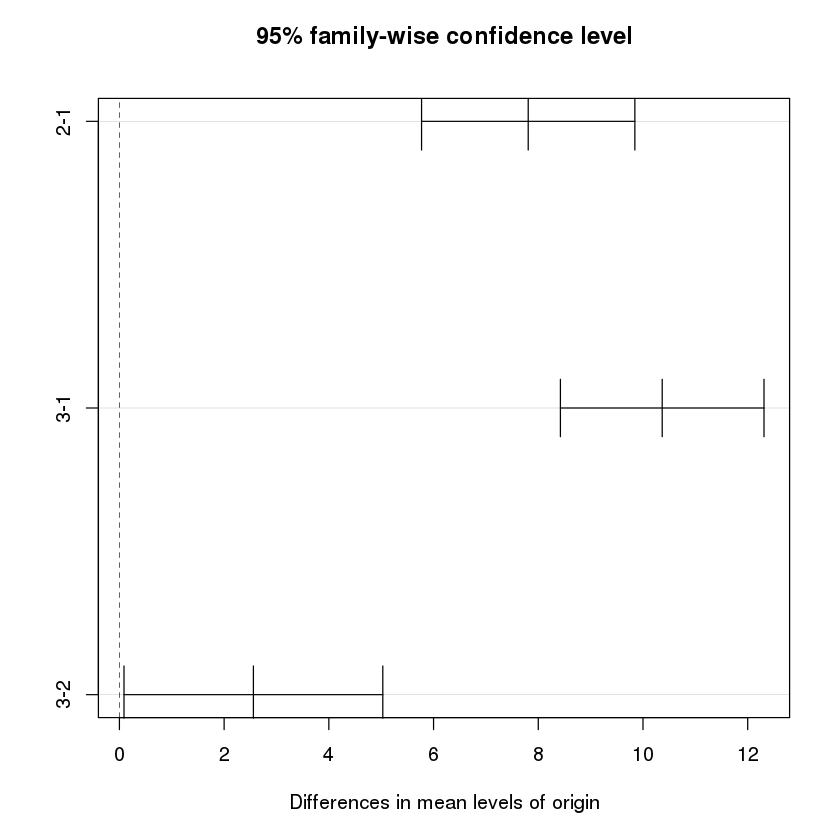

In [11]:
#  graphical representation of the multiple confidence intervals
plot(Tukey)

The above results show that 2-1 and 3-1 differences are significant with p values equal to zero, while 3-2 difference is large with p=0.04.

### ANOVAs with within-subjects variables


#### One-way within ANOVA

Generate test data for testing within subjects anova

In [12]:
groceries = read.table(header=TRUE,text='
subject            storeA  storeB  storeC  storeD
lettuce              1.17    1.78    1.29    1.29
potatoes             1.77    1.98    1.99    1.99
milk                 1.49    1.69    1.79    1.59
eggs                 0.65    0.99    0.69    1.09
bread                1.58    1.70    1.89    1.89
cereal               3.13    3.15    2.99    3.09
ground.beef          2.09    1.88    2.09    2.49
tomato.soup          0.62    0.65    0.65    0.69
laundry.detergent    5.89    5.99    5.99    6.99
aspirin              4.46    4.84    4.99    5.15')

In [13]:
head(groceries)

subject,storeA,storeB,storeC,storeD
lettuce,1.17,1.78,1.29,1.29
potatoes,1.77,1.98,1.99,1.99
milk,1.49,1.69,1.79,1.59
eggs,0.65,0.99,0.69,1.09
bread,1.58,1.70,1.89,1.89
cereal,3.13,3.15,2.99,3.09


In [14]:
str(groceries)

'data.frame':	10 obs. of  5 variables:
 $ subject: Factor w/ 10 levels "aspirin","bread",..: 7 9 8 4 2 3 5 10 6 1
 $ storeA : num  1.17 1.77 1.49 0.65 1.58 3.13 2.09 0.62 5.89 4.46
 $ storeB : num  1.78 1.98 1.69 0.99 1.7 3.15 1.88 0.65 5.99 4.84
 $ storeC : num  1.29 1.99 1.79 0.69 1.89 2.99 2.09 0.65 5.99 4.99
 $ storeD : num  1.29 1.99 1.59 1.09 1.89 3.09 2.49 0.69 6.99 5.15


For performing within-subjects ANOVA with a variable, the data should be in long format, why?

Because the response variable in this case is the price of the items which is listed in four columns(**wide format**). Each of this variables needs to be in ONE column(**long format**) of the data frame in order to use the aov() function.

Above data is in wide format. We have to convert it to long format first. Also, for there must be an identifier column for within subjects ANOVA. In this case, it is subject. This identifier variable must be a factor.

In [15]:
groceries_stacked = stack(groceries)     # Stack the variables StoreA, storeB, storeC and store D
groceries_stacked$subject = rep(rownames(groceries), 4)    # create the "subject" variable and repeat the names of groceries
                                                           # 4 times for 4 store variables stacked.
groceries_stacked$subject = factor(groceries_stacked$subject)            # Convert subject variable to a factor.
colnames(groceries_stacked) = c("price", "store", "subject")  # Gives names to the columns of dataframe groceries_stacked 

Warning message in stack.data.frame(groceries):
“non-vector columns will be ignored”

**Reference: **[stack() to stack data](https://stat.ethz.ch/R-manual/R-devel/library/utils/html/stack.html)

In [16]:
head(groceries_stacked)

price,store,subject
1.17,storeA,1
1.77,storeA,2
1.49,storeA,3
0.65,storeA,4
1.58,storeA,5
3.13,storeA,6


Now that we have the prices of all groceries stacked in a column, we can answer the question which store should we shop at.

In [17]:
with(groceries_stacked, t(tapply(price, store, sum)))

storeA,storeB,storeC,storeD
22.85,24.65,24.36,26.26


For the items in the sample, storeA had the lowest prices. We have to generalize our assertion that this prices difference from storeA holds up in general. An Error term should be supplied, that reflects the fact that the "treatments are nested within subjects.", that is the "store" effect within each and every "subject" (grocery item) can be seen.

In [18]:
aov_within = aov(price ~ store + Error(subject/store), data=groceries_stacked)
summary(aov_within)


Error: subject
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals  9  115.2    12.8               

Error: subject:store
          Df Sum Sq Mean Sq F value Pr(>F)  
store      3 0.5859 0.19529   4.344 0.0127 *
Residuals 27 1.2137 0.04495                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

The p-value of 0.0127 suggests the prices in stores are different. Store and subject are the sources of variability. We are interested in the effect of "store". This variable effect is visible within each subject i.e., nested within each subject. So the Error term is "subject/store", which is read as "store within subject." Once all the "subject" variability is taken out, we are left with the main effect that is from "store".

In [19]:
with(groceries_stacked, pairwise.t.test(x=price, g=store, p.adjust.method="none", paired=T))


	Pairwise comparisons using paired t tests 

data:  price and store 

       storeA storeB storeC
storeB 0.033  -      -     
storeC 0.035  0.695  -     
storeD 0.012  0.245  0.110 

P value adjustment method: none 

Pairwise.t.test suggests all stores have different prices and show some variation in the data. 